In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
insurance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLOps/Tarea Fase 1/insurance_company_modified.csv', header=None)
insurance.head(20)

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45,mixed_type_col
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0,108
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad
5,23.0,1.0,2.0,1.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271
6,39.0,2.0,3.0,2.0,9.0,2.0,2.0,0.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,945
7,33.0,1.0,2.0,3.0,8.0,0.0,7.0,0.0,2.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,invalid,0.0,NaN
8,33.0,1.0,2.0,4.0,8.0,0.0,1.0,3.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,11.0,2.0,3.0,3.0,3.0,3.0,5.0,0.0,2.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,399


#Limpieza de Datos

In [79]:
insurance.shape

(5938, 87)

In [80]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5870 non-null   object
 1   1       5865 non-null   object
 2   2       5874 non-null   object
 3   3       5869 non-null   object
 4   4       5878 non-null   object
 5   5       5864 non-null   object
 6   6       5859 non-null   object
 7   7       5875 non-null   object
 8   8       5876 non-null   object
 9   9       5877 non-null   object
 10  10      5872 non-null   object
 11  11      5872 non-null   object
 12  12      5872 non-null   object
 13  13      5853 non-null   object
 14  14      5878 non-null   object
 15  15      5867 non-null   object
 16  16      5875 non-null   object
 17  17      5875 non-null   object
 18  18      5856 non-null   object
 19  19      5871 non-null   object
 20  20      5860 non-null   object
 21  21      5853 non-null   object
 22  22      5886 non-null   

In [81]:
insurance.describe(include='all').T

,count,unique,top,freq
0,5870,155,33.0,768
1,5865,82,1.0,4953
2,5874,76,3.0,2513
3,5869,86,3.0,2806
4,5878,80,8.0,1478
...,...,...,...,...
82,5890,43,0.0,5415
83,5877,41,0.0,5523
84,5876,40,0.0,5444
85,5859,32,0.0,5173


In [82]:
''' A partir de la visualización parcial del archivo CSV, se observa que la mayoría de los datos son de tipo numérico entero.
    Por ello, se procede a modificar el tipo de dato del DataFrame para asegurar una correcta manipulación y análisis, dejando
    como valores nulos aquellos que no sean de tipo númerico y/o vacíos.'''

for col in insurance.columns:
    if insurance[col].dtype == 'object':
        insurance[col] = pd.to_numeric(insurance[col], errors='coerce')
        insurance[col] = insurance[col].round().astype('Int64')

insurance.fillna(value=np.nan, inplace=True)

In [83]:
nulos_pre = insurance.isnull().mean()*100
display(nulos_pre.sort_values(ascending=False))

,0
86,29.235433
58,1.886157
73,1.886157
85,1.835635
13,1.818794
...,...
22,1.178848
76,1.162007
81,1.145167
31,1.128326


In [84]:
'''Con base en la descripción de las variables, se confirma que el conjunto de datos contiene únicamente 86 variables,
  incluyendo la variable objetivo. Durante el análisis de valores nulos, se detectó que la última columna presentaba
  más del 29% de datos no numéricos y, además, no formaba parte del conjunto de variables contempladas originalmente.
  Por lo tanto, se decidió eliminar dicha columna para mantener la coherencia del análisis.'''
insurance.drop(columns=[86], inplace=True)

In [85]:
'''Sabiendo que la variable de salida es la última columna, se eliminan aquellos registros con valores nulos, al no ser útiles para el análisis'''

null_count = insurance[85].isnull().sum()
null_percentage = (null_count / len(insurance)) * 100

print(f"Número de valores nulos en la variable de salida: {null_count}")
print(f"Porcentaje de nulos en la variable de salida: {null_percentage:.2f}%")

insurance.dropna(subset=[85], inplace=True)

Número de valores nulos en la variable de salida: 109
Porcentaje de nulos en la variable de salida: 1.84%


In [86]:
'''Por otro lado, sabemos que y es la variable de salida y únicamente toma valores 0 o 1'''

invalid_values_count = insurance[~insurance[85].isin([0, 1])].shape[0]
invalid_values_percentage = (invalid_values_count / len(insurance)) * 100

print(f"Número de valores en la variable de salida que no son 0 ni 1: {invalid_values_count}")
print(f"Porcentaje de valores en la variable de salida que no son 0 ni 1: {invalid_values_percentage:.2f}%")

insurance = insurance[insurance[85].isin([0, 1])]

Número de valores en la variable de salida que no son 0 ni 1: 22
Porcentaje de valores en la variable de salida que no son 0 ni 1: 0.38%


In [87]:
insurance.to_csv('/content/drive/My Drive/Colab Notebooks/MLOps/Tarea Fase 2/insurance.csv', index=False)

#EDA

In [88]:
  print(insurance.head())
  print(insurance.shape)
  print(insurance.describe().T)
  print(insurance.info())

   0   1   2   3   4   5   6     7   8   9   ...  76  77  78  79    80  81  \
0  33   1   3   2   8   0   5     1   3   7  ...   0   0   0   1     0   0   
1  37   1   2   2   8   1   4  <NA>   4   6  ...   0   0   0   1  <NA>   0   
2  37   1   2   2   8   0   4     2   4   3  ...   0   0   0   1     0   0   
3   9   1   3   3   3   2   3     2   4   5  ...   0   0   0   1     0   0   
4  40   1   4   2  10   1   4     1   4   7  ...   0   0   0   1     0   0   

   82  83  84  85  
0   0   0   0   0  
1   0   0   0   0  
2   0   0   0   0  
3   0   0   0   0  
4   0   0   0   0  

[5 rows x 86 columns]
(5807, 86)
     count       mean         std  min   25%   50%   75%      max
0   5719.0  34.598531  119.997406  1.0  10.0  30.0  35.0   3321.0
1   5713.0   4.647821   48.074594  1.0   1.0   1.0   1.0    997.0
2   5723.0   6.228551   45.078984  1.0   2.0   3.0   3.0    983.0
3   5714.0   7.575779   51.371349  1.0   2.0   3.0   3.0    990.0
4   5723.0  10.182771   52.042421  1.0   3.0   

In [89]:
'''Análisis de valores nulos'''

nulos = insurance.isnull().mean()*100
display(nulos.sort_values(ascending=False))

,0
58,1.894266
73,1.877045
13,1.842604
25,1.773721
55,1.773721
...,...
76,1.171001
81,1.136559
31,1.119339
32,1.102118


In [90]:
porcentaje_nulos_por_fila = insurance.isnull().mean(axis=1)*100
porcentajes_filtrados = porcentaje_nulos_por_fila [porcentaje_nulos_por_fila >= 5]
print(len(porcentajes_filtrados))
display (porcentajes_filtrados.sort_values(ascending=False))

55


,0
5658,8.139535
648,6.976744
704,6.976744
2392,6.976744
2670,6.976744
2257,6.976744
912,6.976744
3100,6.976744
4434,6.976744
5846,6.976744


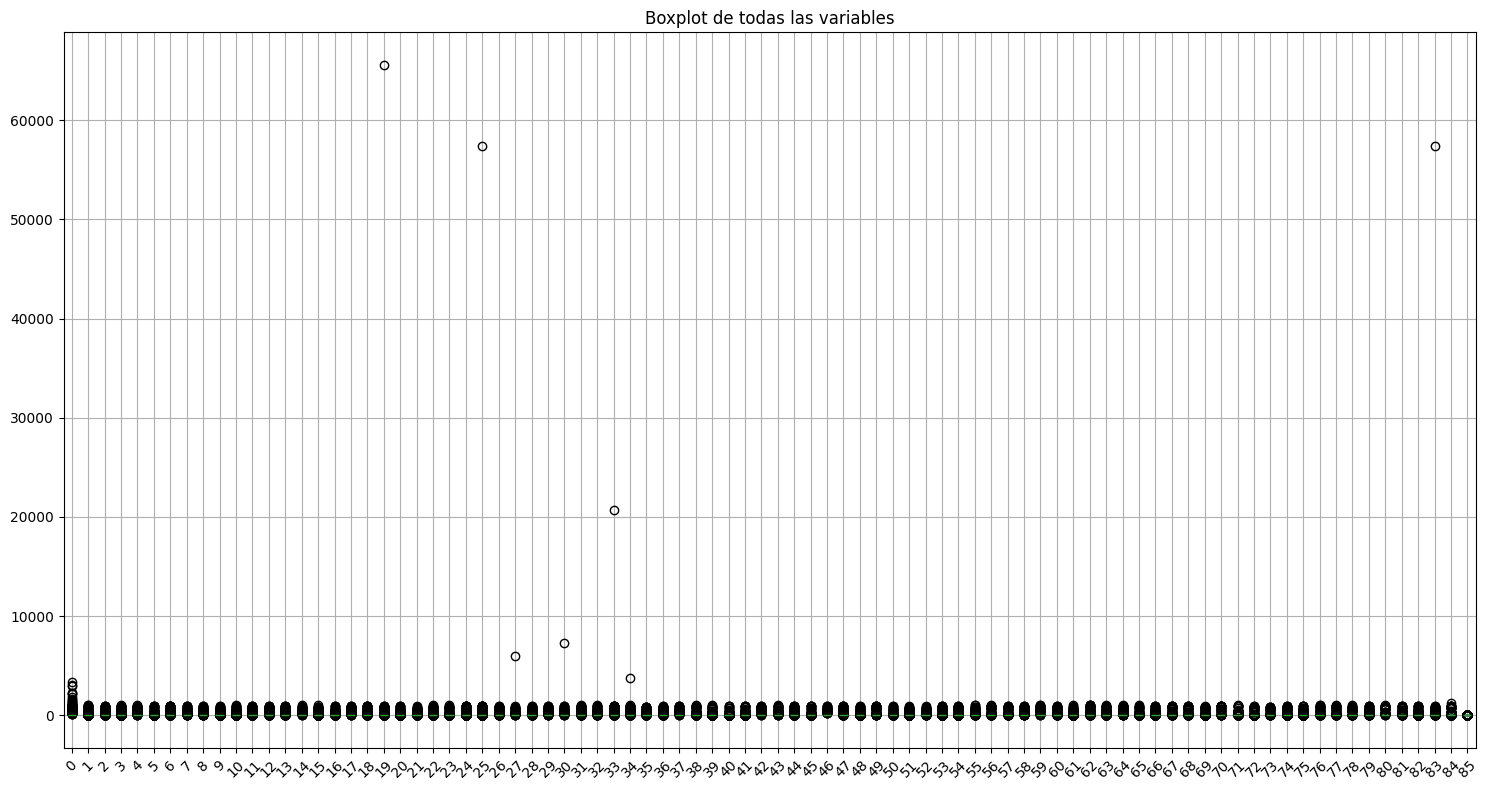

In [91]:
'''Análisis de Outliers'''

plt.figure(figsize=(15, 8))
insurance.boxplot()
plt.title('Boxplot de todas las variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

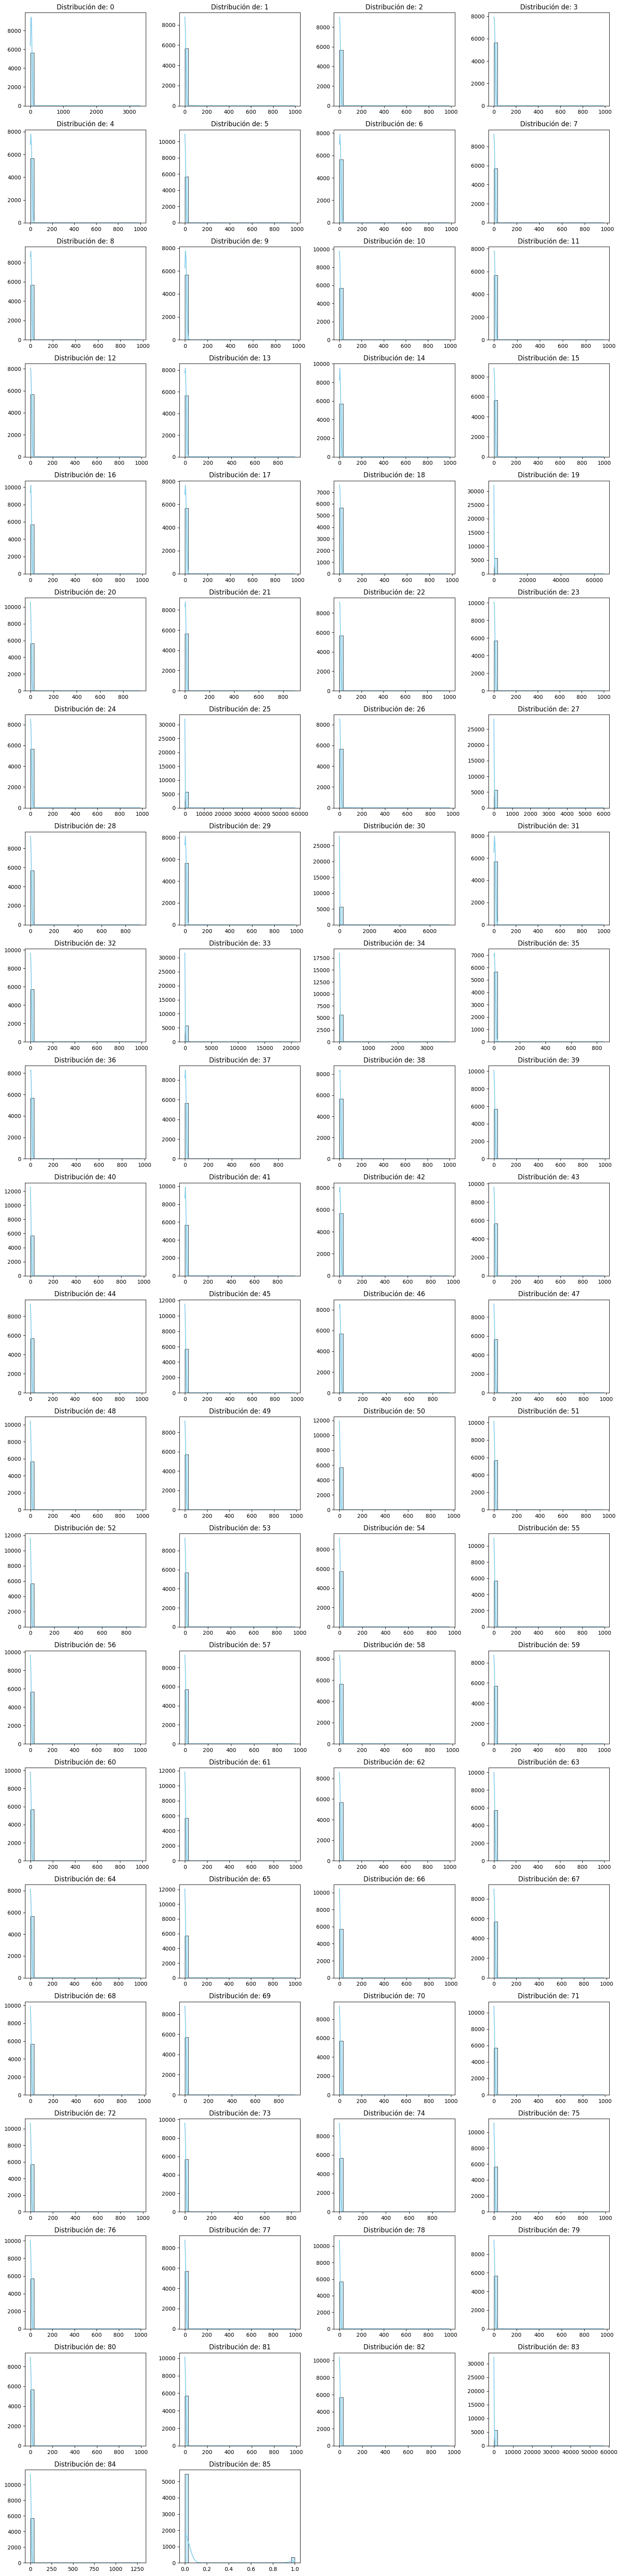

In [92]:
'''Análisis de la distribución de las variables'''
cols_per_row = 4
total_cols = len(insurance.columns)
rows = (total_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(insurance.columns):
    sns.histplot(insurance[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar subplots vacíos si hay más espacios que columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [93]:
skew_values = insurance.skew()
filtered_skew = skew_values[(skew_values > 1) | (skew_values < -1)]
sorted_skew = filtered_skew.sort_values(ascending=False)
sorted_skew

,0
83,75.345972
19,75.277885
25,75.005182
33,71.625414
27,58.413281
...,...
35,13.518927
17,13.411716
4,13.400012
9,11.97137


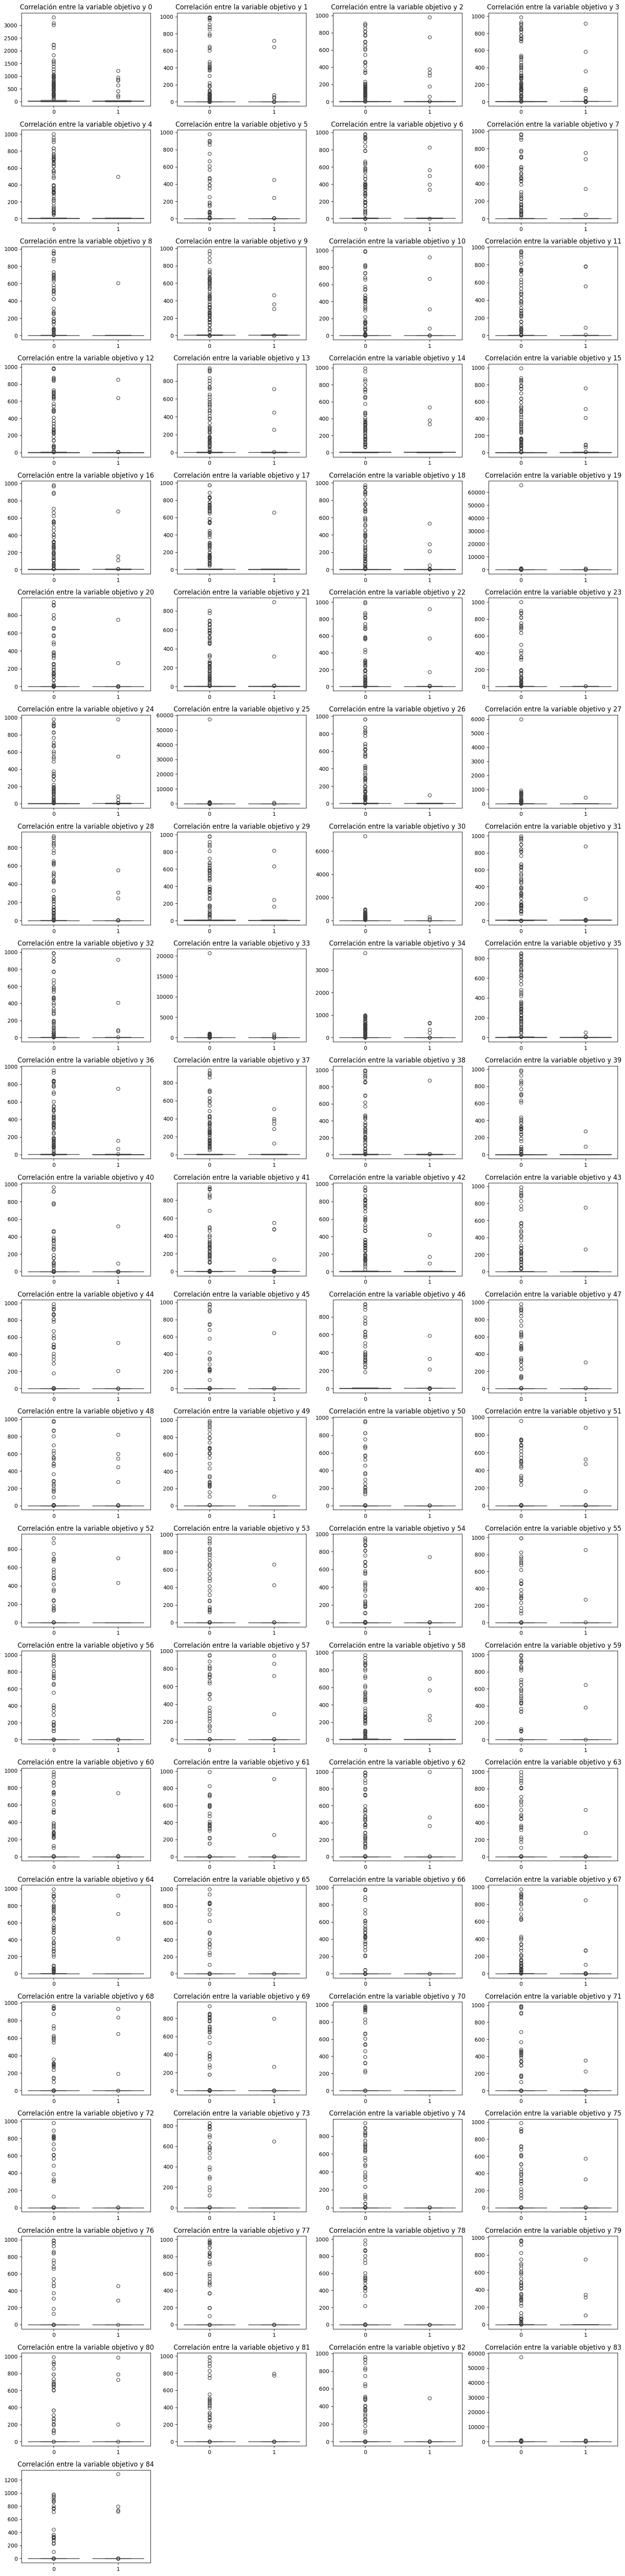

In [94]:
'''Análisis de la correlación de las variables independendientes con la variable objetivo'''
cols_per_row = 4
total_cols = len(insurance.columns) - 1
rows = (total_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(insurance.columns[:-1]):
    sns.boxplot(x=insurance.iloc[:, -1],y=insurance[col], ax=axes[i])
    axes[i].set_title(f'Correlación entre la variable objetivo y {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar subplots vacíos si hay más espacios que columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


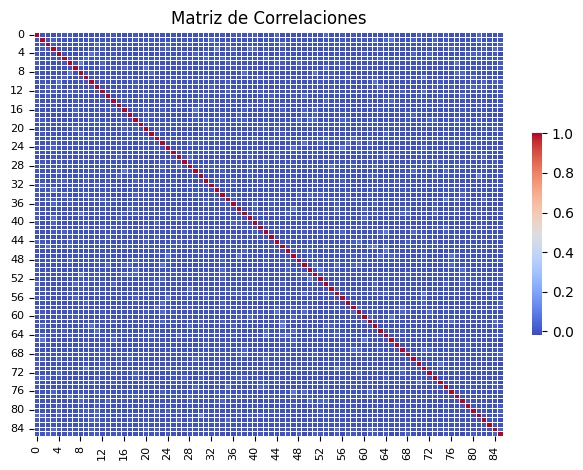

In [95]:
'''Análisis de correlación entre las variables'''

plt.figure()
sns.heatmap(insurance.corr(), annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.title('Matriz de Correlaciones')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

#FEATURE ENGINEERING

In [96]:
'''Eliminación de duplicados'''
insurance = insurance.drop_duplicates()

In [97]:
'''Tratamiento de valores nulos'''
porcentaje_nulos_por_fila = insurance.isnull().mean(axis=1)*100

insurance = insurance[porcentaje_nulos_por_fila <= 5]

In [98]:
X = insurance.iloc[:, :-1]
y = insurance.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
'''Imputación de valores nulos y reemplazo de valores extremos'''

for col in X_train.columns:

  Q1 = X_train[col].quantile(0.25)
  Q3 = X_train[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  mediana = X_train[col].median()

  X_train[col] = X_train[col].fillna(mediana)
  X_test[col] = X_test[col].fillna(mediana)

  X_train[col] = X_train[col].apply(lambda x: mediana if x < lower or x > upper else x)
  X_test[col] = X_test[col].apply(lambda x: mediana if x < lower or x > upper else x)

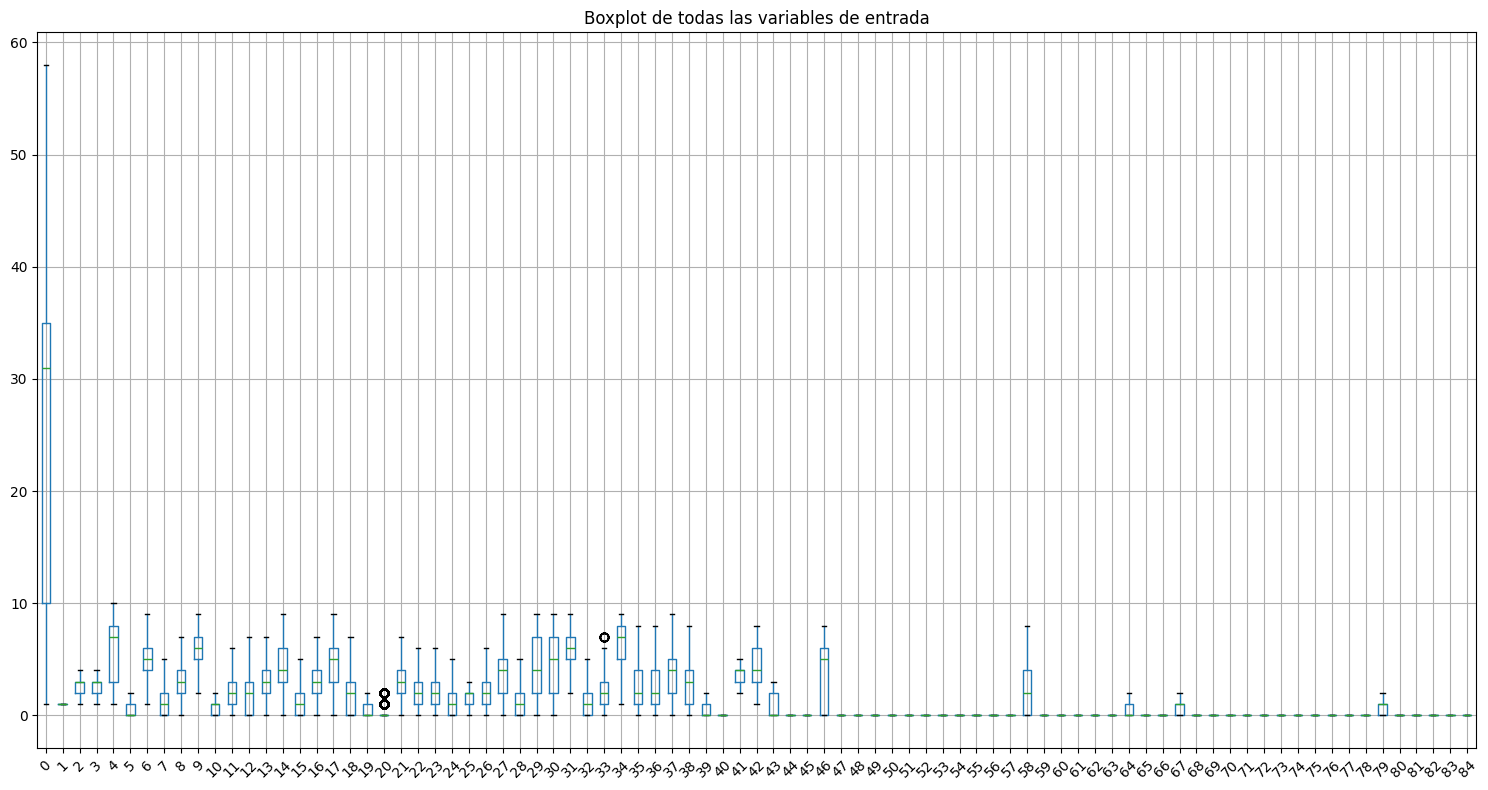

In [100]:
plt.figure(figsize=(15, 8))
X_train.boxplot()
plt.title('Boxplot de todas las variables de entrada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

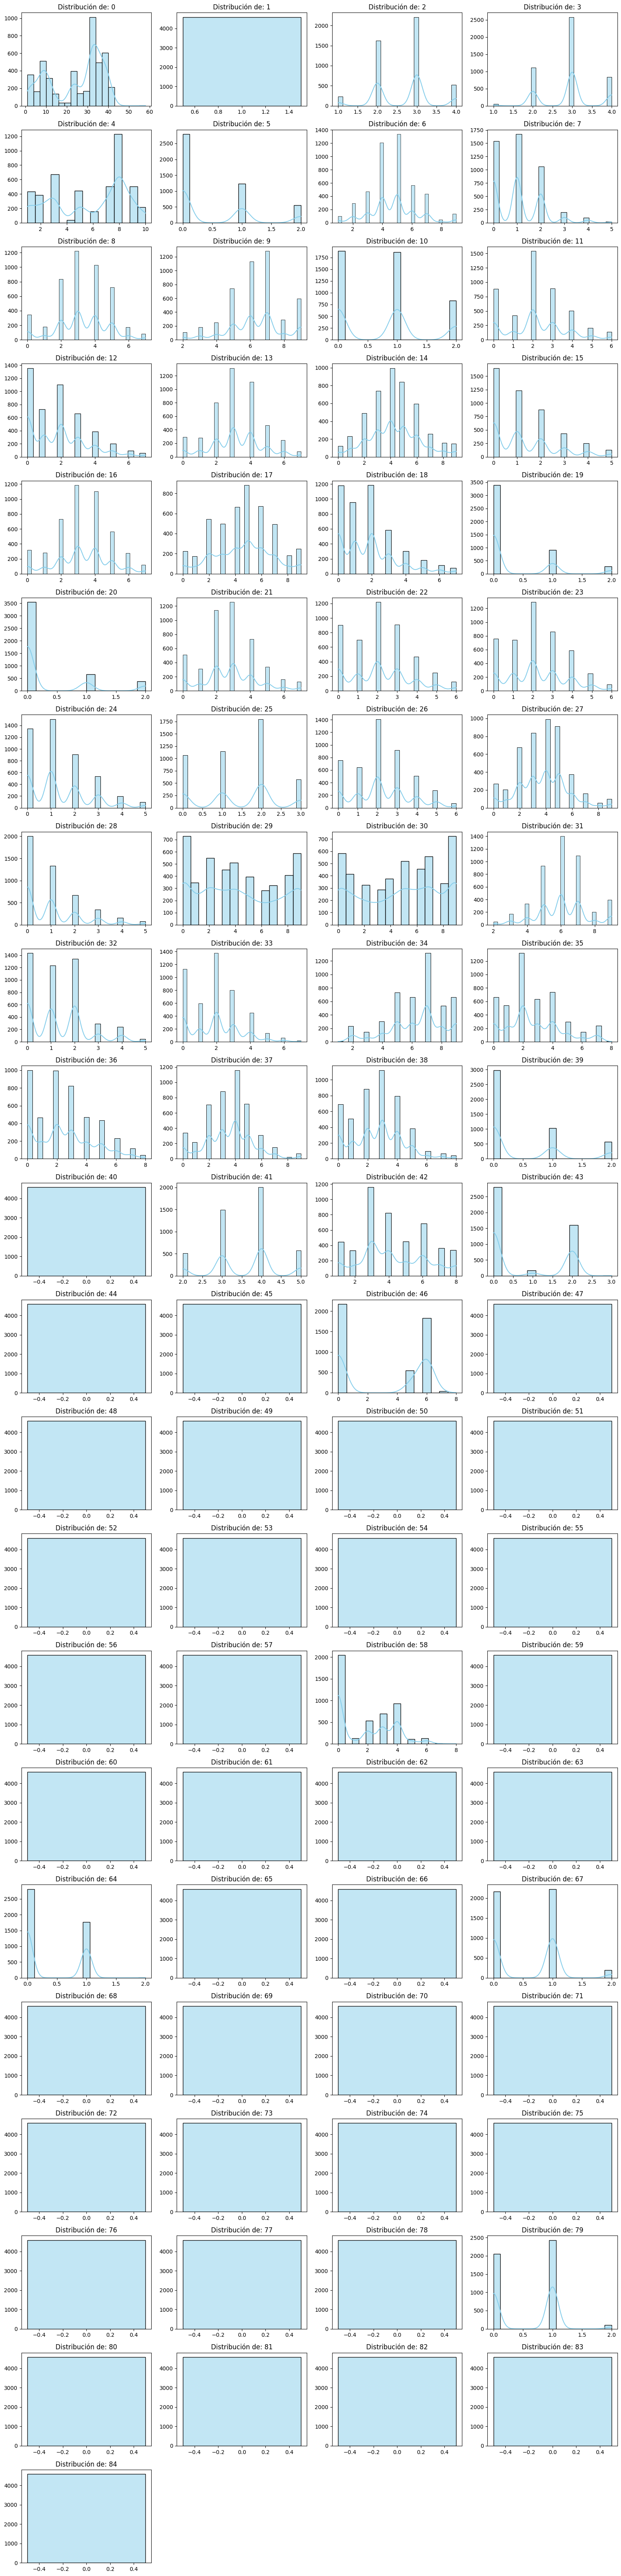

In [101]:
cols_per_row = 4
total_cols = len(X_train.columns)
rows = (total_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar subplots vacíos si hay más espacios que columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

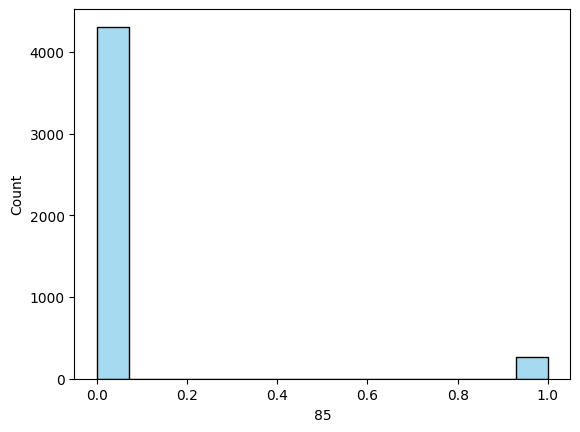

In [102]:
sns.histplot(y_train, color='skyblue');

In [103]:
skew_values = X_train.skew()
filtered_skew = skew_values[(skew_values > 1) | (skew_values < -1)]
sorted_skew = filtered_skew.sort_values(ascending=False)
sorted_skew

,0
20,1.823502
19,1.652294
28,1.233875
39,1.157789
5,1.014340


In [104]:
y_train.skew()

np.float64(3.730657999676538)

In [105]:
'''Eliminación de variables correlacionadas'''

correlation_matrix = X_train.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]
print(high_corr_columns)

X_train = X_train.drop(columns=high_corr_columns)

[4, 14, 64, 67, 79]


In [106]:
high_corr_columns

[4, 14, 64, 67, 79]

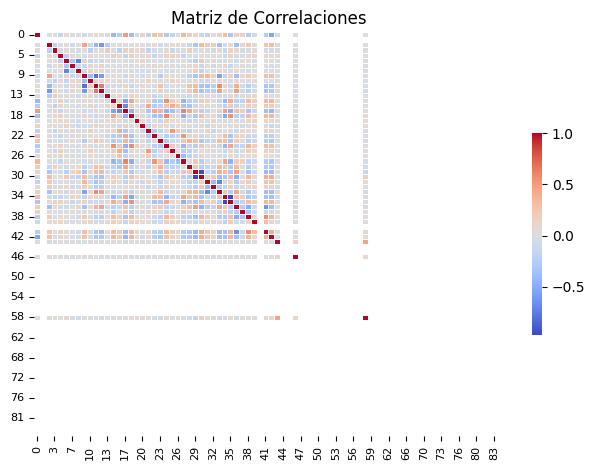

In [107]:
plt.figure()
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.title('Matriz de Correlaciones')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

In [108]:
'''Normalización de variables'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Número de componentes necesarios para explicar ≥90% de la varianza: 26


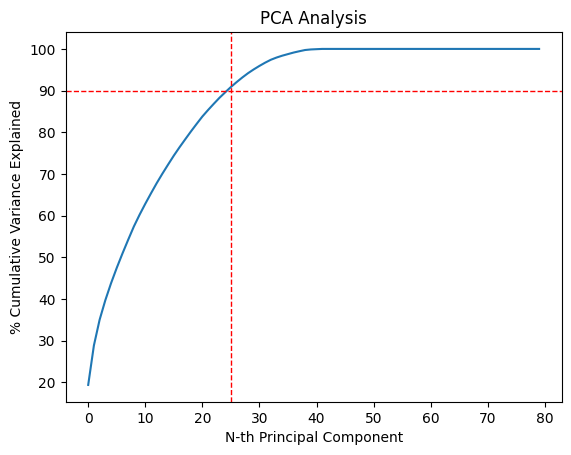

In [109]:
'''Se realiza la reducción de variables mediante PCA'''
from sklearn.decomposition import PCA
pca = PCA()
X_train_PCA = pca.fit_transform(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90)+1

print(f"Número de componentes necesarios para explicar ≥90% de la varianza: {n_components_90}")

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')

plt.axhline(y=90, color='r', linestyle='--', linewidth=1)
plt.axvline(x=n_components_90-1, color='r', linestyle='--', linewidth=1)

plt.show()

In [110]:
pca = PCA(n_components=n_components_90)
X_train_VF = pca.fit_transform(X_train_scaled)

#AJUSTE DEL MODELO

In [111]:
print(f"Distribución de clases: {y_train.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'}")

Distribución de clases: 85
0    94.1%
1     5.9%
Name: proportion, dtype: object


In [112]:
'''Correlación con la variable objetivo'''
df = pd.concat([pd.DataFrame(X_train_VF), pd.Series(y_train, name='target')], axis=1)
corr = abs(df.corr()['target'].sort_values(ascending=False))
print("Correlación con la variable dependiente:\n", corr)

Correlación con la variable dependiente:
 target    1.000000
25        0.027336
18        0.026601
23        0.022869
10        0.022828
4         0.022356
14        0.019300
19        0.018438
3         0.015920
15        0.013060
5         0.009739
20        0.008394
21        0.004827
16        0.000030
11        0.003529
7         0.006313
9         0.007896
17        0.009031
12        0.009910
13        0.011206
2         0.012594
22        0.012809
8         0.015066
6         0.015156
1         0.024609
0         0.024752
24        0.046136
Name: target, dtype: float64


In [113]:
'''Se realizan las transformaciones hechas en el conjunto de entrenamiento para el conjunto de prueba'''

X_test = X_test.drop(columns=high_corr_columns)
X_test_scaled = scaler.transform(X_test)
X_test_VF = pca.transform(X_test_scaled)

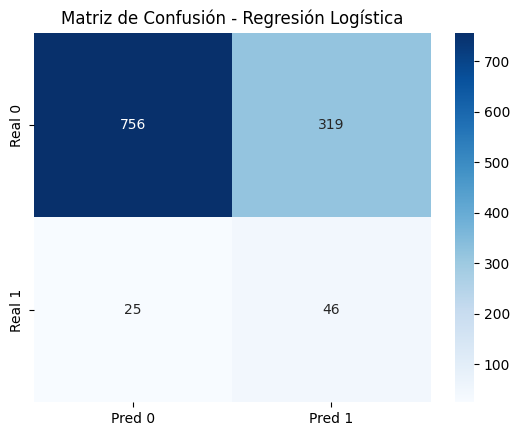


Reporte de clasificación - Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81      1075
         1.0       0.13      0.65      0.21        71

    accuracy                           0.70      1146
   macro avg       0.55      0.68      0.51      1146
weighted avg       0.92      0.70      0.78      1146



In [115]:
'''Se inicia el proceso de probar con modelos a pesar de que las variables independientes
  muestran correlación baja con la variable dependiente'''


'''Se hace la prueba con el modelo de regresión logística'''

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Aplicar SMOTE en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_VF, y_train)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

'''Se realiza la predicción'''

y_pred = model.predict(X_test_VF)

cm = confusion_matrix(y_test, y_pred)

# Visualización
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Métricas adicionales
print("\nReporte de clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred, zero_division=0))



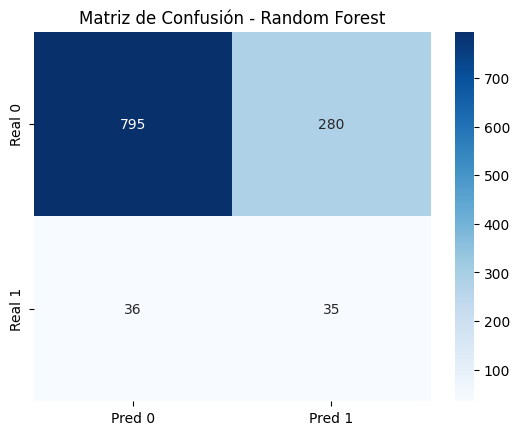


Reporte de clasificación - Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83      1075
         1.0       0.11      0.49      0.18        71

    accuracy                           0.72      1146
   macro avg       0.53      0.62      0.51      1146
weighted avg       0.90      0.72      0.79      1146



In [116]:
'''Se hace la prueba con el modelo de Random Forest'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_VF, y_train)

'''Se entrena el modelo'''
tree_model = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
tree_model.fit(X_train_resampled, y_train_resampled)

'''Se realiza la predicción'''

y_pred = tree_model.predict(X_test_VF)

cm = confusion_matrix(y_test, y_pred)

# Visualización
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Métricas adicionales
print("\nReporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred, zero_division=0))


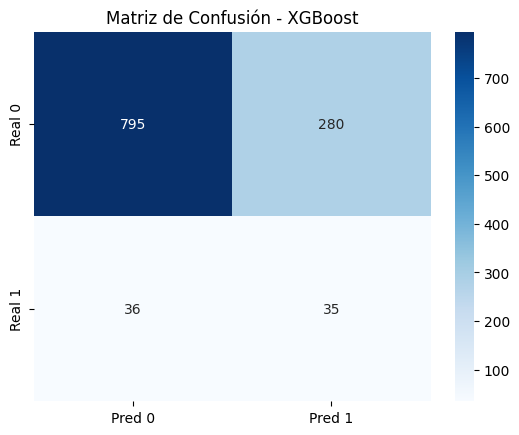


Reporte de clasificación - XGBoost:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1075
         1.0       0.15      0.25      0.19        71

    accuracy                           0.87      1146
   macro avg       0.55      0.58      0.56      1146
weighted avg       0.90      0.87      0.88      1146



In [117]:
'''Se hace la úlitma prueba con el modelo de XGBoost
    para terminar de confirmar si es posible predecir la variable objetivo con las variables independientes'''

from xgboost import XGBClassifier


# Calcular scale_pos_weight (para desbalance)
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_VF, y_train)

'''Se entrena el modelo'''

xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    colsample_bytree=1,
    subsample= 0.8,
    random_state=42,
    eval_metric='aucpr'
)

xgb_model.fit(X_train_resampled, y_train_resampled)

'''Se realiza la predicción'''

y_pred = xgb_model.predict(X_test_VF)

# Visualización
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión - XGBoost')
plt.show()

# Métricas adicionales
print("\nReporte de clasificación - XGBoost:")
print(classification_report(y_test, y_pred, zero_division=0))